In [1]:
import numpy as np
from sklearn import neighbors
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import gc
# garbage collector
# to use gc.collect()  ---> WIll free you memory

- In all the plots below we made the grid colored according to its K-Nearest Neighbors.
- First we trained our KNN model on the training set.
- Then we divided the grid in parts where each part represents a data point and we predicted the class label of those data points in grid with the help of our trained KNN model.
- That's how we color coded the grid

In [2]:
def knn_classifier(data, n_neighbors,algo='auto'):
    
    
    X = data[:,0]
    Y = data[:,1]
    label = data[:,2]
    
    cmap_light = colors.ListedColormap(['#DCDCDC',  '#6687ff'])  # returns a color object
    cmap_bold = colors.ListedColormap(['#ffffff', '#0000ff'])
    
    # Training the KNN model on our data
    knn = neighbors.KNeighborsClassifier(n_neighbors,n_jobs=4,algorithm = algo) #n_neighbors is the value of K in KNN. n_jobs the number of cpu to use
    knn.fit(np.vstack((X,Y)).T, label)  # Here we need to give (X,Y) as array of shape (m,2)
    
    h = 0.02 # grid cell size
    # Each cell of 0.02 will represent a data point
    
    x_max,x_min = X.max()+1, X.min()-1
    y_max,y_min = Y.max()+1, Y.min()-1
    
    # Creating X and Y grid points
    x_grid_matrix, y_grid_matrix = np.meshgrid(np.arange(x_min,x_max,h),np.arange(y_min,y_max,h)) # dividing the grid in small region.
    # where each region represent a data point
    
    # Now we need to decide the color of each of these grid points
    predicted_label = knn.predict(np.c_[x_grid_matrix.ravel(), y_grid_matrix.ravel()])
         
    # x_grid_matrix.ravel() will give a flatten array

    # np.c_ : Translates slice objects to concatenation along the second axis.
    # > np.c_[np.array([1,2,3]), np.array([4,5,6])]
    # > array([[1, 4],
    #          [2, 5],
    #          [3, 6]])   (source: np.c_ documentation)
    
    predicted_label = predicted_label.reshape(x_grid_matrix.shape)
    
    plt.pcolormesh(x_grid_matrix, y_grid_matrix, predicted_label, cmap = cmap_light)
    
    plt.scatter(X,Y,c=label,cmap=cmap_bold) # Another way of plotting scatter plots with hue in matplot
    plt.title('K value = '+str(n_neighbors))
    plt.show()

![](meshgrid_image.png)

## __<font color="orange">You can import mlxtend and use plot_decision_regions instead of writing above cell!</font>__

(100, 3)


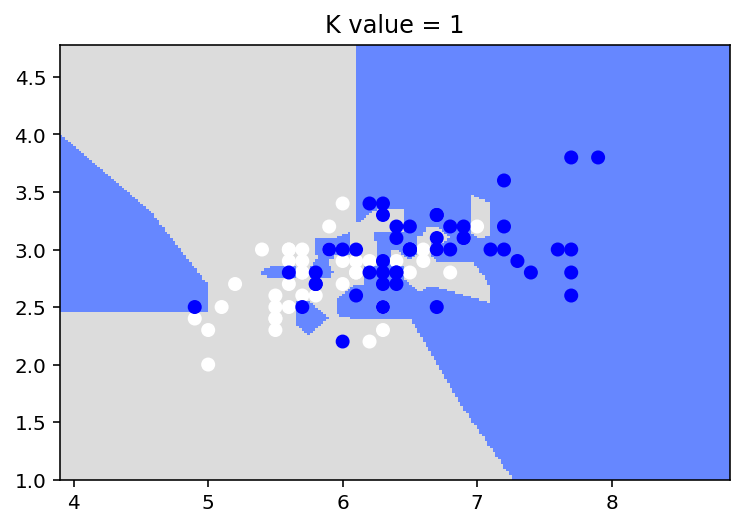

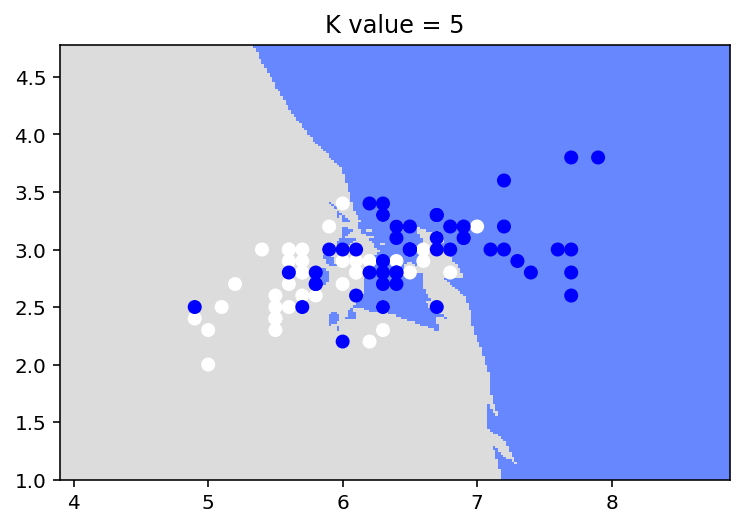

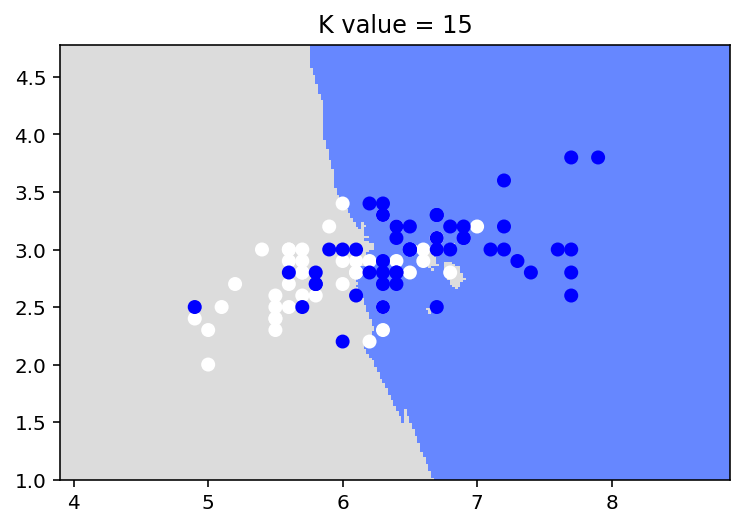

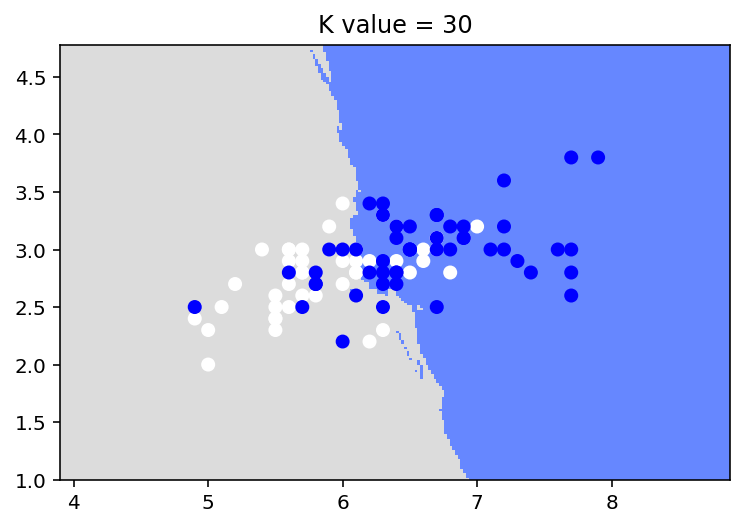

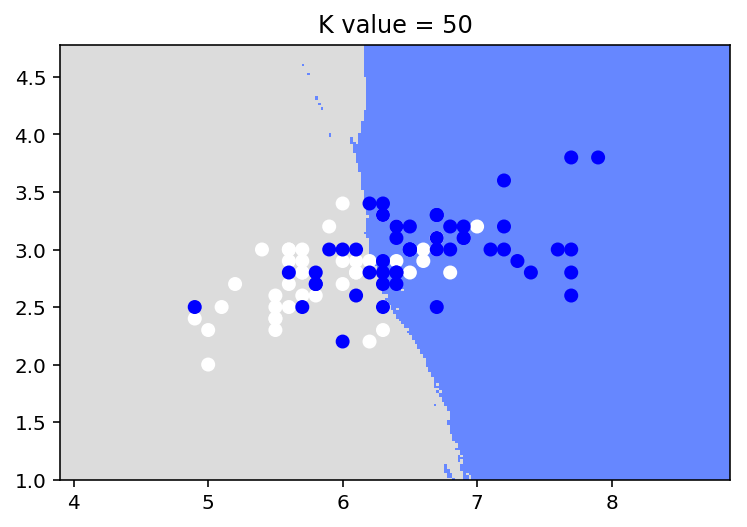

In [95]:
data = np.genfromtxt('demo_data/6.overlap.csv',delimiter = ',')  # Here we need to use delimiter that is used to seperate values on the basis of the string given
print(data.shape)
knn_classifier(data, 1)
knn_classifier(data, 5)
knn_classifier(data, 15)
knn_classifier(data, 30)
knn_classifier(data, 50)

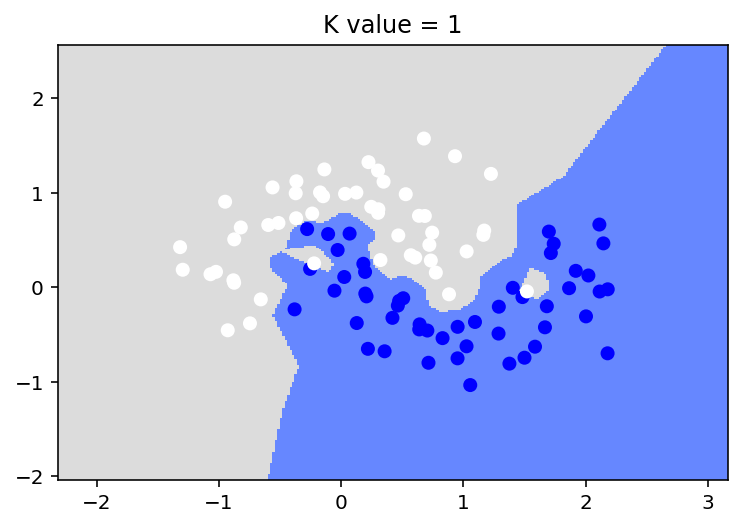

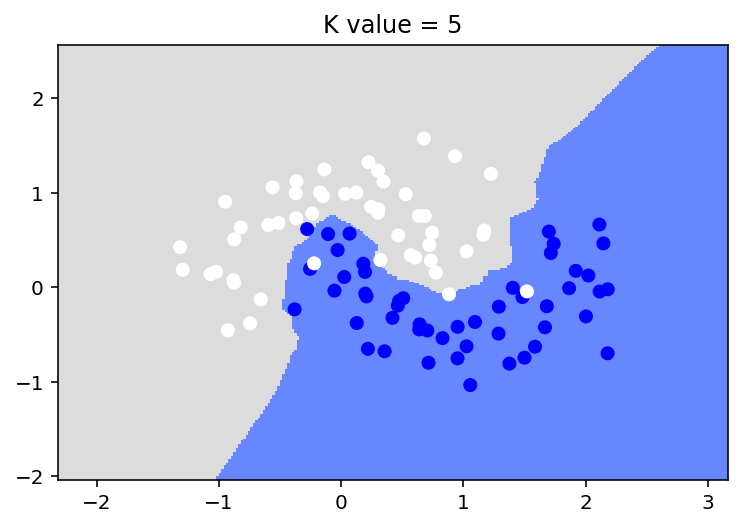

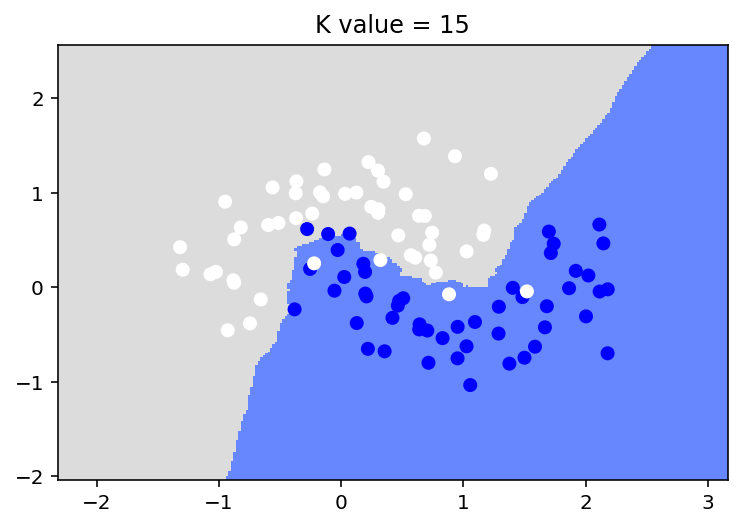

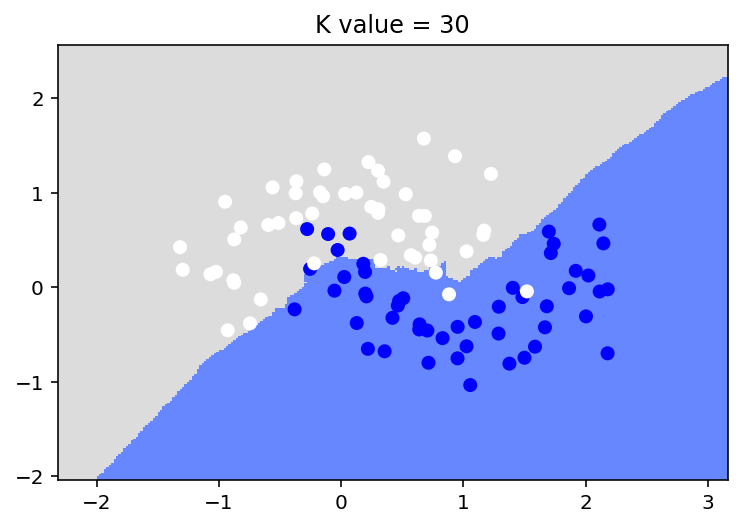

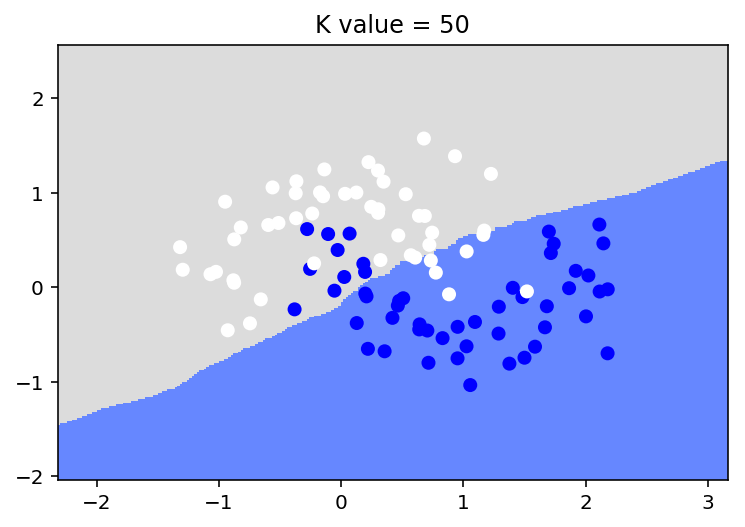

In [98]:
data = np.genfromtxt('demo_data/1.ushape.csv', delimiter=',')
knn_classifier(data, 1)
knn_classifier(data, 5)
knn_classifier(data, 15)
knn_classifier(data, 30)
knn_classifier(data, 50)

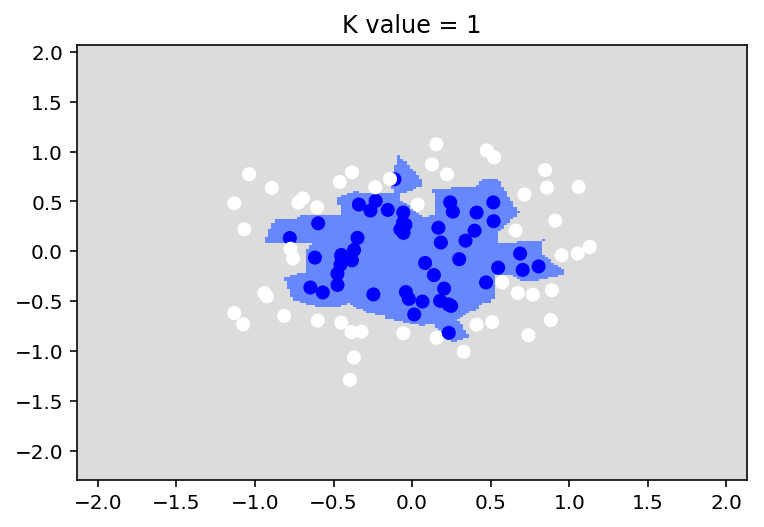

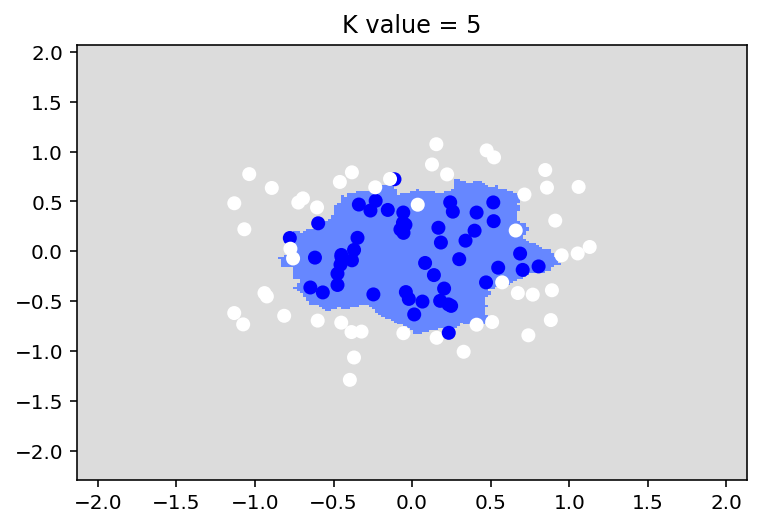

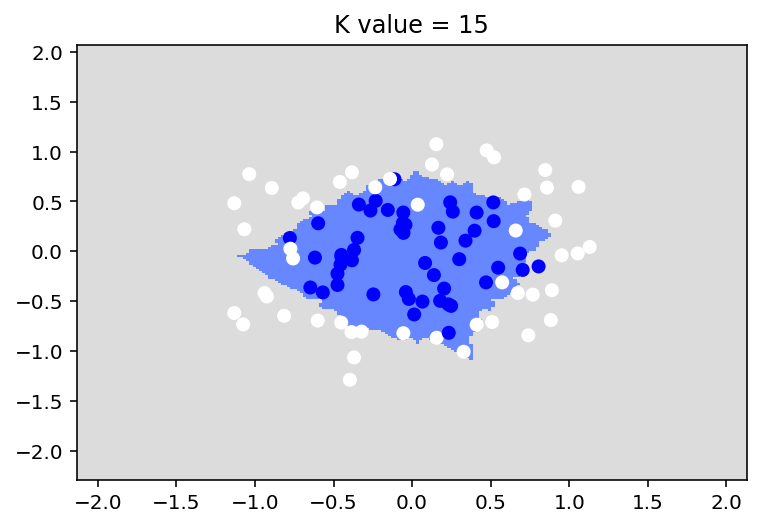

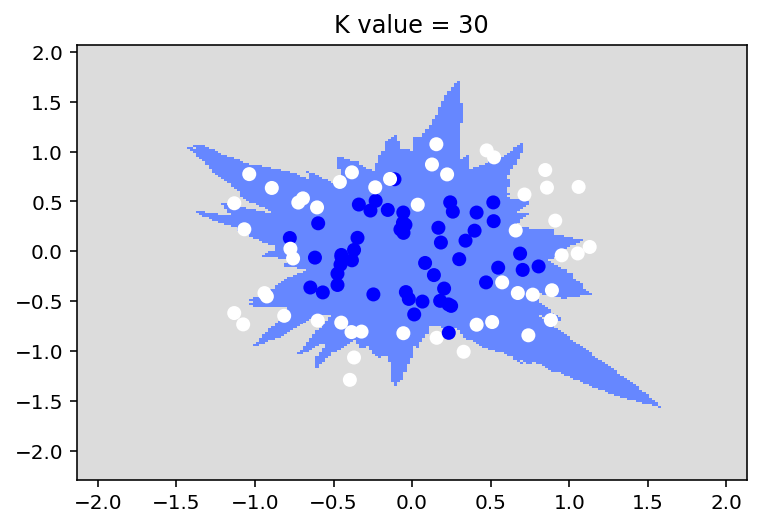

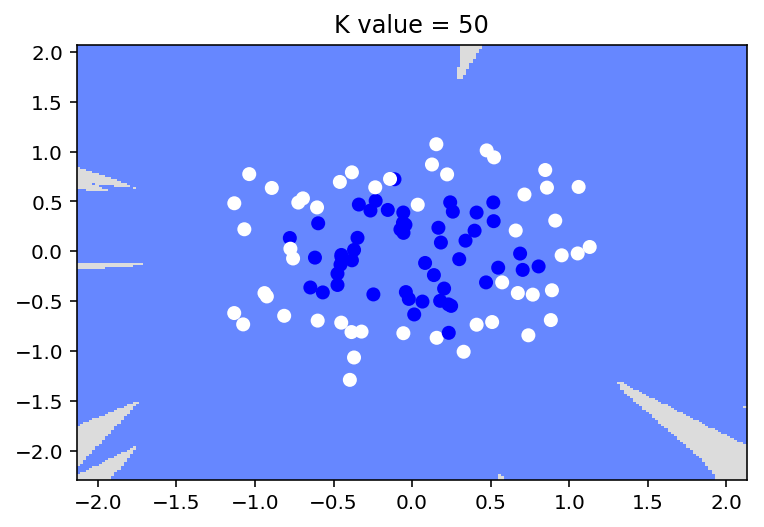

In [99]:
data = np.genfromtxt('demo_data/2.concerticcir1.csv', delimiter=',')
knn_classifier(data, 1)
knn_classifier(data, 5)
knn_classifier(data, 15)
knn_classifier(data, 30)
knn_classifier(data, 50)

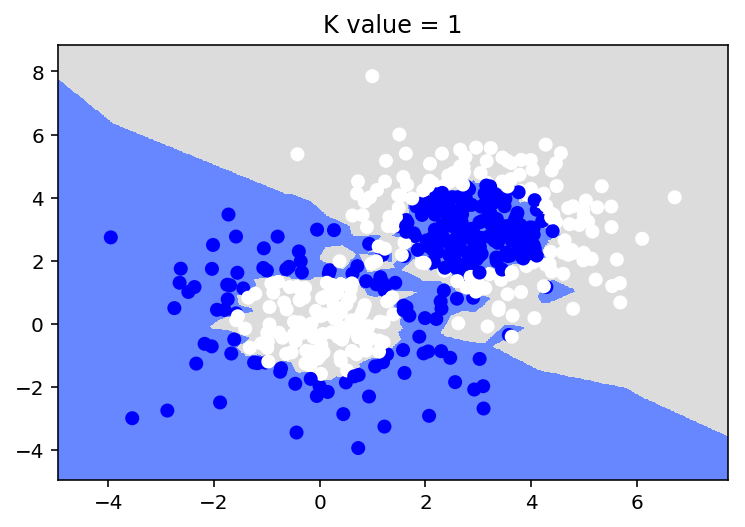

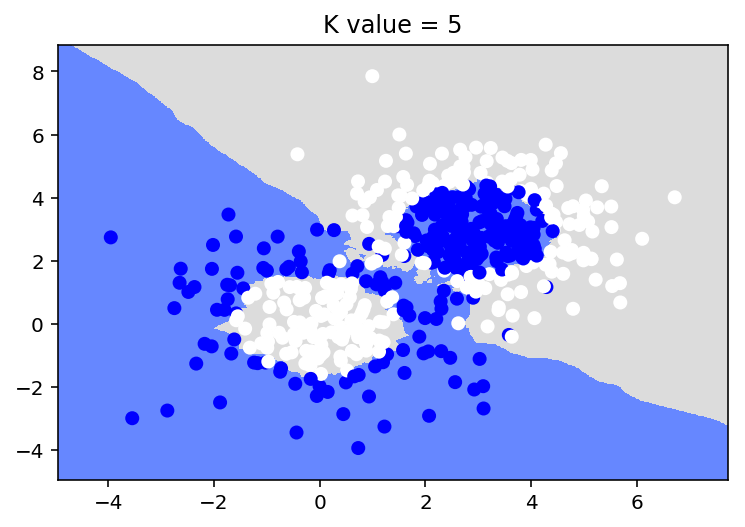

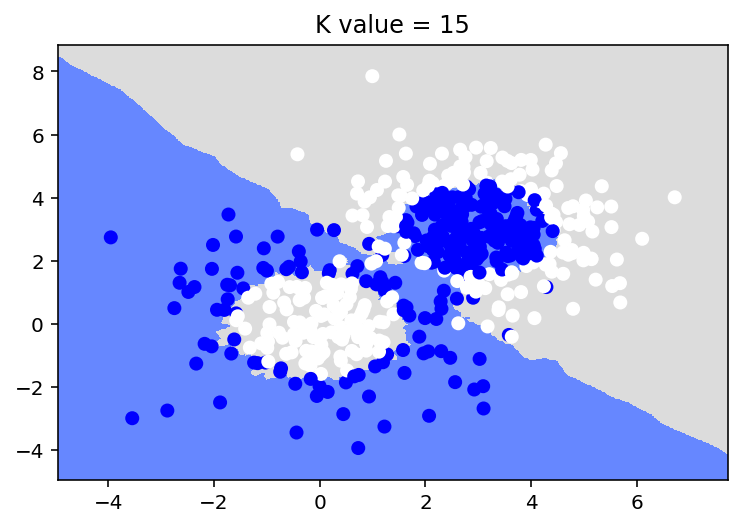

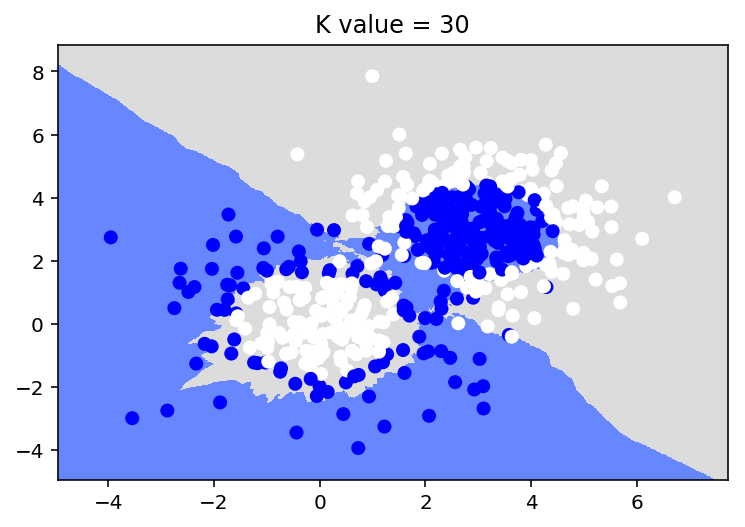

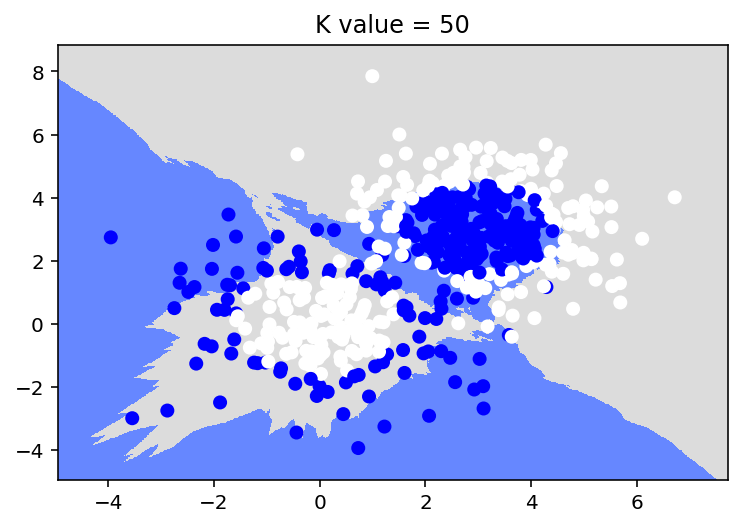

In [101]:
data = np.genfromtxt('demo_data/3.concertriccir2.csv', delimiter=',')
knn_classifier(data, 1)
knn_classifier(data, 5)
knn_classifier(data, 15)
knn_classifier(data, 30)
knn_classifier(data, 50)

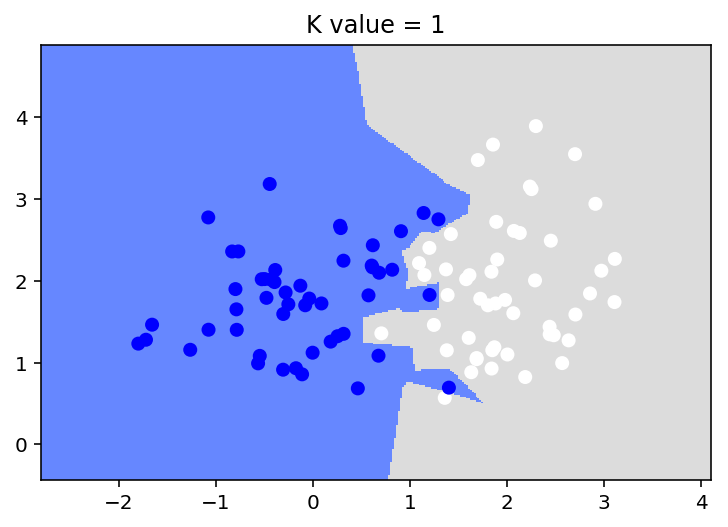

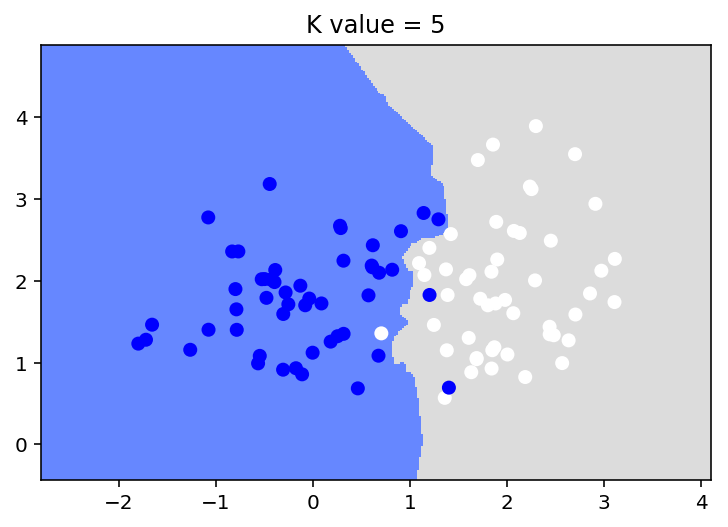

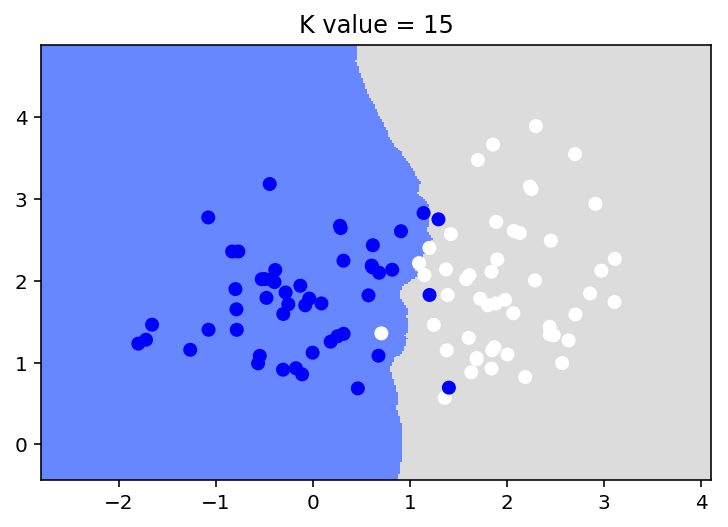

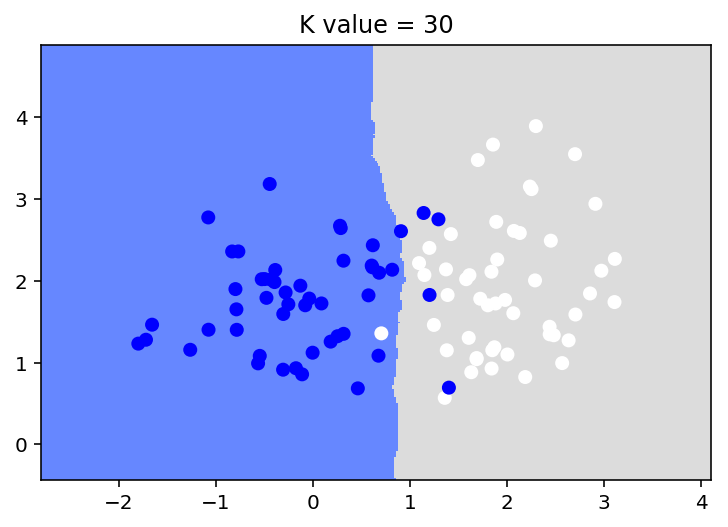

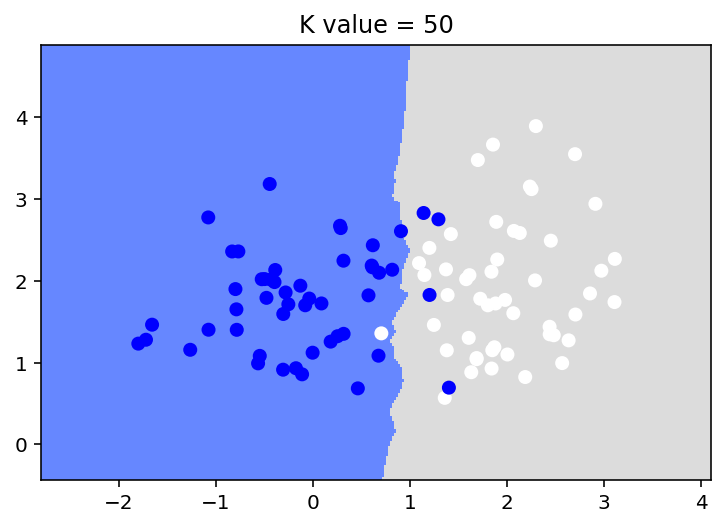

In [102]:
data = np.genfromtxt('demo_data/4.linearsep.csv', delimiter=',')
knn_classifier(data, 1)
knn_classifier(data, 5)
knn_classifier(data, 15)
knn_classifier(data, 30)
knn_classifier(data, 50)

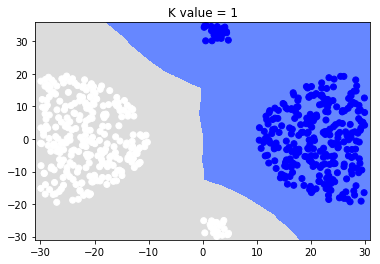

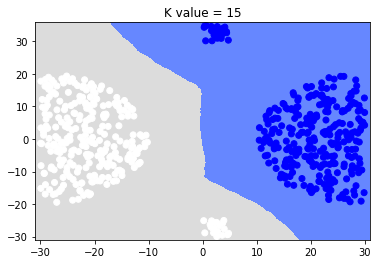

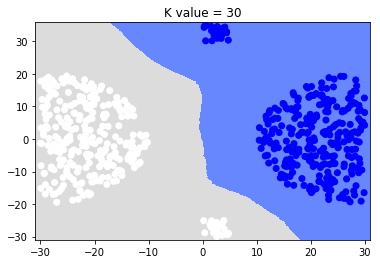

2341

In [3]:
data = np.genfromtxt('demo_data/5.outlier.csv', delimiter=',')
knn_classifier(data, 1,'kd_tree')
gc.collect()
knn_classifier(data, 15,'kd_tree')
gc.collect()
knn_classifier(data, 30,'ball_tree')
gc.collect()

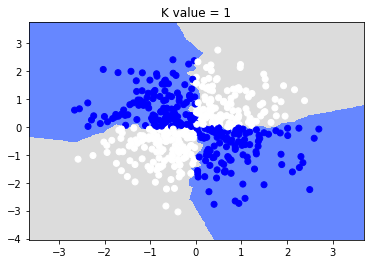

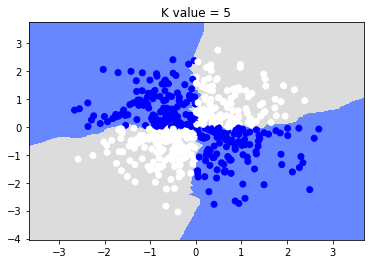

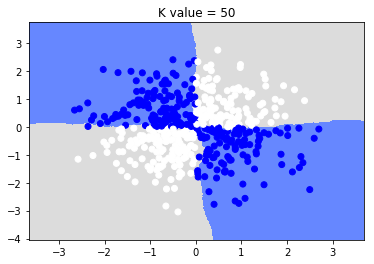

2376

In [4]:
data = np.genfromtxt('demo_data/7.xor.csv', delimiter=',')
knn_classifier(data, 1)
knn_classifier(data, 5)
knn_classifier(data, 50)

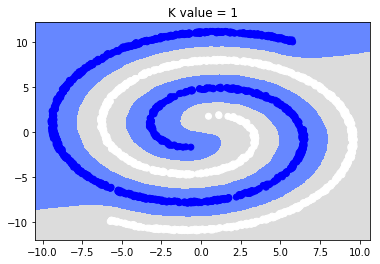

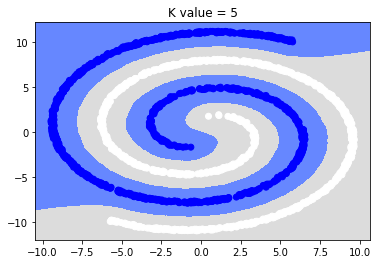

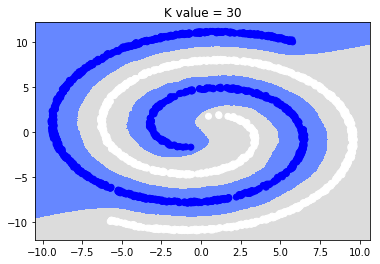

2330

In [5]:
data = np.genfromtxt('demo_data/8.twospirals.csv', delimiter=',')
knn_classifier(data, 1)
knn_classifier(data, 5)
knn_classifier(data, 30)

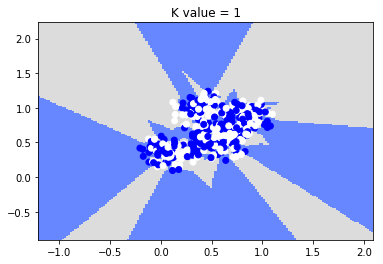

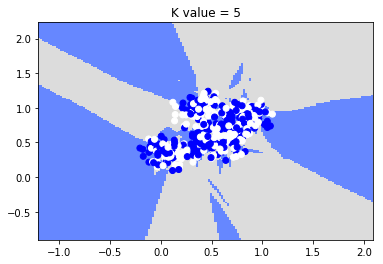

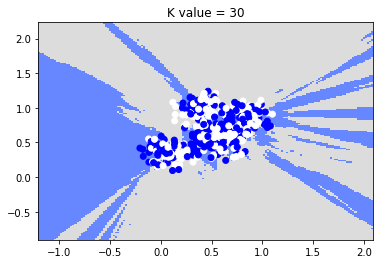

2280

In [6]:
data = np.genfromtxt('demo_data/9.random.csv', delimiter=',')
knn_classifier(data, 1)
knn_classifier(data, 5)
knn_classifier(data, 30)
# Random data will not make any snese does not matter what k is